In [469]:
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.optimize import curve_fit
import seaborn as sns

In [523]:
pixel_to_m = 0.12048e-6 # m +/- 0.003e-6


In [524]:
def bb_box_to_point(bb_box):
    # Get the midpoint of bb_box (x1, y1, x2, y2)
    x1 = bb_box[0]
    y1 = bb_box[1]
    w = bb_box[2]
    h = bb_box[3]
    x_mid = x1 + w/2
    y_mid = y1 + h/2
    return x_mid, y_mid

def dist(x1, y1, x2, y2):
    # return (x2-x1)
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

def get_files(folder):
    files = []
    for file in os.listdir(folder):
        if file.endswith(".txt"): 
            files.append(file)
    return files

In [619]:
# A set of bad data
bad_data = ['Set10a-0.txt',
 'Set10a-2.txt',
 'Set1a-0.txt',
 'Set1a-3.txt',
 'set1b-0.txt',
 'set1b-5.txt',
 'Set4a-1.txt',
 'set4b-2.txt',
 'set5b-3.txt',
 'Set6a-1.txt',
 'Set6a-2.txt',
 'Set7a-6.txt',
 'set7b-3.txt',
 'Set8a-2.txt',
 'set8b-2.txt',
 'Set3a-0.txt',
 'Set3a-1.txt',
 'Set7a-3.txt',
#  Set10a-0.txt,Set10a-2.txt,Set1a-0.txt,Set1a-3.txt,Set7a-6.txt
 ]
bad_data = ['Set10a-0.txt','Set10a-2.txt','Set1a-0.txt','Set1a-3.txt','Set7a-6.txt',
"Set10a-5.txt",
"Set6a-2.txt",
"set7b-3.txt",
"Set9a-2.txt",
# 'set4b-2.txt','set5b-1.txt','set5b-3.txt','set8b-2.txt'
# 'Set10a-1.txt','Set10a-3.txt','Set10a-4.txt','set1b-0.txt','Set2a-0.txt','Set2a-1.txt','Set2a-2.txt','Set2a-3.txt','Set3a-0.txt','Set3a-1.txt','Set3a-2.txt','set3b-3.txt','Set4a-0.txt','Set4a-1.txt','Set4a-2.txt','Set5a-0.txt','Set5a-1.txt','set5b-0.txt','Set6a-0.txt','Set6a-1.txt','set6b-1.txt','set6b-2.txt','Set7a-2.txt','Set7a-3.txt','Set7a-4.txt','Set7a-5.txt','set7b-0.txt','set7b-2.txt','Set8a-0.txt','Set8a-1.txt','Set8a-2.txt','Set8a-3.txt','Set8a-4.txt','Set8a-5.txt','Set8a-6.txt','set8b-0.txt','set8b-1.txt','set8b-2.txt','Set9a-1.txt','Set9a-3.txt'
]
bad_data = [
    'Set10a-3.txt','Set2a-0.txt','Set3a-0.txt','Set3a-1.txt','Set4a-0.txt','Set4a-1.txt','Set5a-0.txt','Set5a-1.txt','Set6a-0.txt','Set7a-1.txt','Set7a-4.txt','set7b-1.txt','Set8a-0.txt','Set8a-1.txt','Set8a-3.txt','Set9a-1.txt','Set9a-2.txt',
    'Set10a-0.txt','Set10a-1.txt','Set10a-2.txt','Set2a-1.txt','Set2a-2.txt','set5b-0.txt','set6b-0.txt','set6b-2.txt','Set7a-0.txt','Set7a-3.txt','set7b-2.txt','Set8a-2.txt','set8b-0.txt'
]

In [620]:
# print(temp)

# import pyperclip
# pyperclip.copy("','".join(temp))

# Plot Paths

In [621]:
FILEPATH = "output"

file_list = get_files(FILEPATH)

# Remove bad_data from file_list
for bad_file in bad_data:
    file_list.remove(bad_file)

# Open up output/set5b-1.txt, convert each line to point, and plot
t_array = []
r_array = []
x_array = []
y_array = []
temp = []
for file in file_list:
    with open(FILEPATH + "/" + file, "r") as f:
        lines = f.readlines()

        r_list = []
        t_list = []
        x_list = []
        y_list = []

        x0, y0 = -1, -1
        t0 = 0
        i = 0
        for line in lines:
            bb_box = np.array([float(i) for i in line.split(",")[1:]])*pixel_to_m

            x_mid, y_mid = bb_box_to_point(bb_box)

            t = float(line.split(",")[0])
            if x0 == -1:
                x0, y0 = x_mid, y_mid

            t_list.append(i)
            r_list.append(dist(x0, y0, x_mid, y_mid))
            x_list.append(x_mid-x0)
            y_list.append(y_mid-y0)
            i += 1

        # Ignore stationary ones and the ones that exit the screen
        if(r_list[-1] == r_list[-2] == r_list[-3]) or max(r_list) > 150:
            print(f"Skipping {file}")
            temp.append(file)
        # elif(r_list[-1] > 2.8612e-5 or r_list[-1] < 3e-7):
        #     print(f"Skipping {file}, Outlier")
        elif(r_list[-1] > 60*pixel_to_m):
            print(f"Skipping {file}, Outlier")
            temp.append(file)
        else:
            t_array.append(t_list)
            r_array.append(r_list)
            x_array.append(x_list)
            y_array.append(y_list)

Text(0, 0.5, 'Distance from Origin')

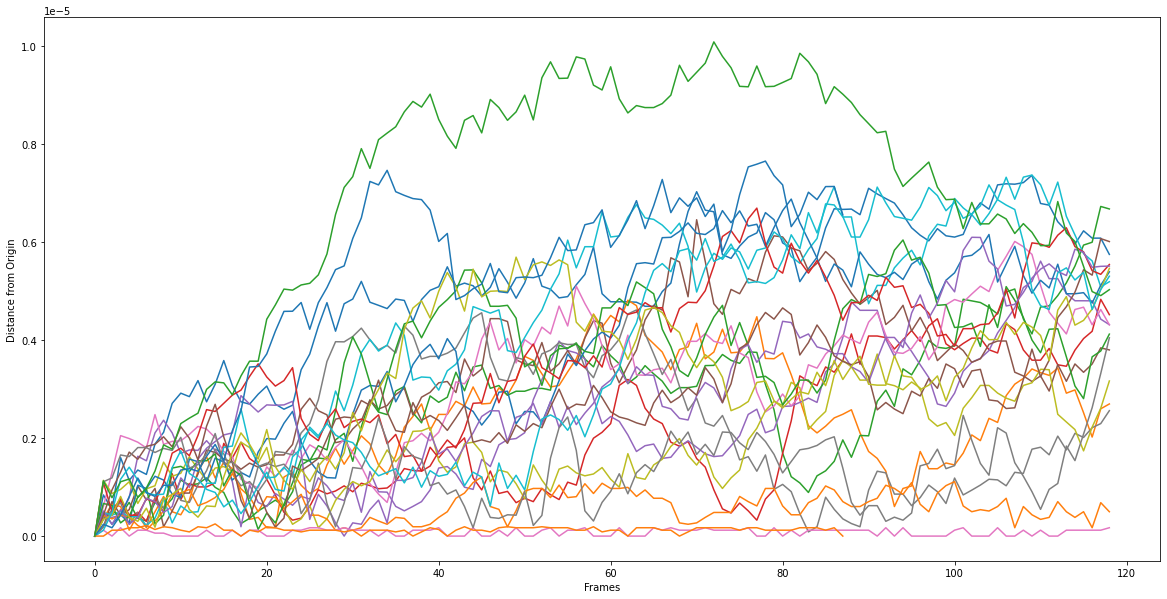

In [622]:
plt.figure(figsize=(20,10))

# Plot t_array and r_array
for i in range(len(t_array)):
    plt.plot(t_array[i], r_array[i], label=file_list[i])

plt.xlabel("Frames")
plt.ylabel("Distance from Origin")

Text(0, 0.5, 'y')

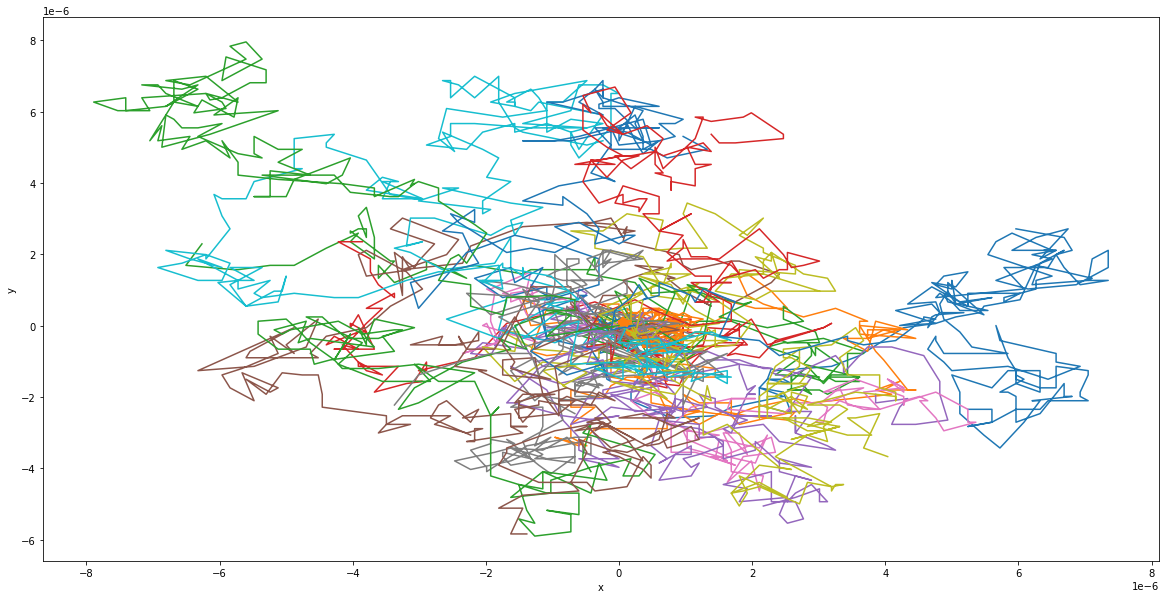

In [623]:
plt.figure(figsize=(20,10))

# Plot x_array and y_array
for i in range(len(x_array)):
    plt.plot(x_array[i], y_array[i], label=file_list[i])

plt.xlabel("x")
plt.ylabel("y")

In [624]:
last_y_arr = np.array([y_array[i][-1] for i in range(len(y_array))])
last_x_arr = np.array([x_array[i][-1] for i in range(len(x_array))])

dist_arr = np.sqrt(last_x_arr**2 + last_y_arr**2)
# Standard deviation of dist_arr
std_dev = np.std(dist_arr)
avg = np.mean(dist_arr)
avg + 1.5 * std_dev

print(avg)

# 2.8612e-5

4.1973633505657164e-06


In [625]:
%matplotlib widget # Will require pip install ipympl

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Plot t_array against x_array and y_array in a 3d plot
for i in range(len(t_array)):
    ax.plot(t_array[i], x_array[i], y_array[i], label=file_list[i])

ax.set_xlabel('Frames')
ax.set_ylabel('x')
ax.set_zlabel('y')
plt.show() 

UsageError: unrecognized arguments: # Will require pip install ipympl


# Make Histogram

In [626]:
step_sizes = []

FILEPATH = "output"

file_list = get_files(FILEPATH)

# Remove bad_data from file_list
for bad_file in bad_data:
    file_list.remove(bad_file)

# Open up output/set5b-1.txt, convert each line to point, and plot

for file in file_list:
    with open(FILEPATH + "/" + file, "r") as f:
        lines = f.readlines()

        x0, y0 = -1, -1
        i = 0

        for line in lines:
            bb_box = [float(i) for i in line.split(",")[1:]]

            x_mid, y_mid = bb_box_to_point(bb_box)
            x_mid *= pixel_to_m
            y_mid *= pixel_to_m

            if i > 0:
                step_sizes.append(dist(x0, y0, x_mid, y_mid))
            x0, y0 = x_mid, y_mid
            i += 1

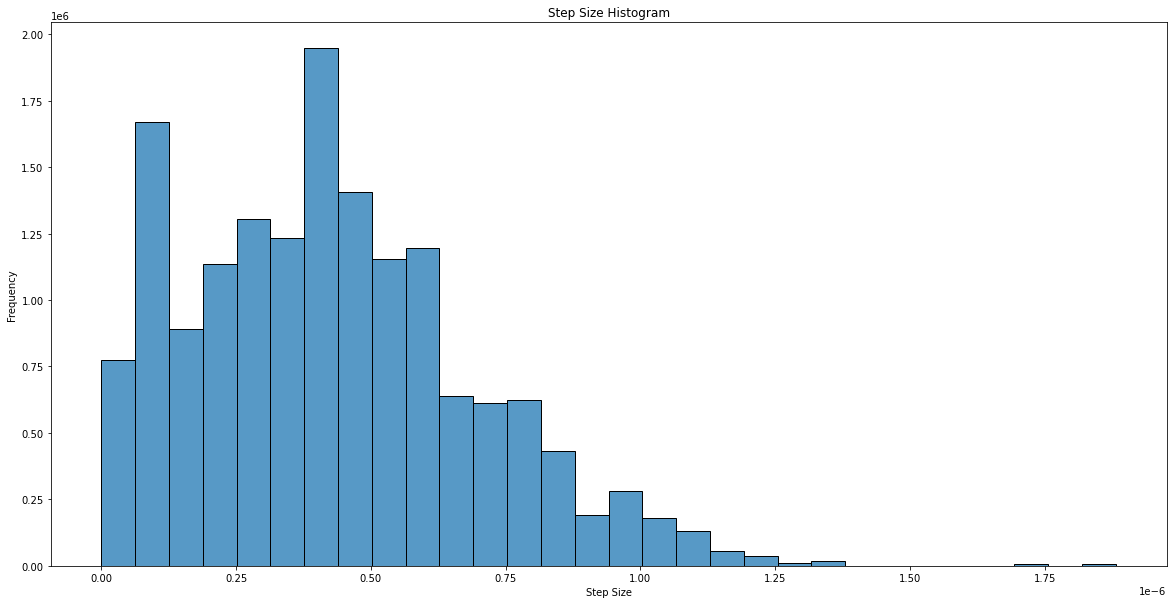

In [650]:
# Histogram of step sizes
plt.figure(figsize=(20,10))
# plt.hist(step_sizes, bins=25)
sns.histplot(data=step_sizes, stat='density', bins=30)
plt.xlabel("Step Size")
plt.ylabel("Frequency")
plt.title("Step Size Histogram")
plt.show()

In [628]:
# Get frequency of each step size with bin=25
step_sizes_hist = np.histogram(step_sizes, bins=40)
step_size, freq = step_sizes_hist[1][:-1] , step_sizes_hist[0]
freq = freq / (np.sum(freq) * (step_size[1] - step_size[0]))

In [645]:
def f(x, a):
    return x/(2*a) * np.exp(-x**2/(4*a))

In [646]:
# Fit f(x) to step_size, freq
h = step_size[1] - step_size[0]
step_size = step_size + h/2
popt, pcov = curve_fit(f, step_size, freq, p0=[1e-14])
popt

array([7.14588394e-14])

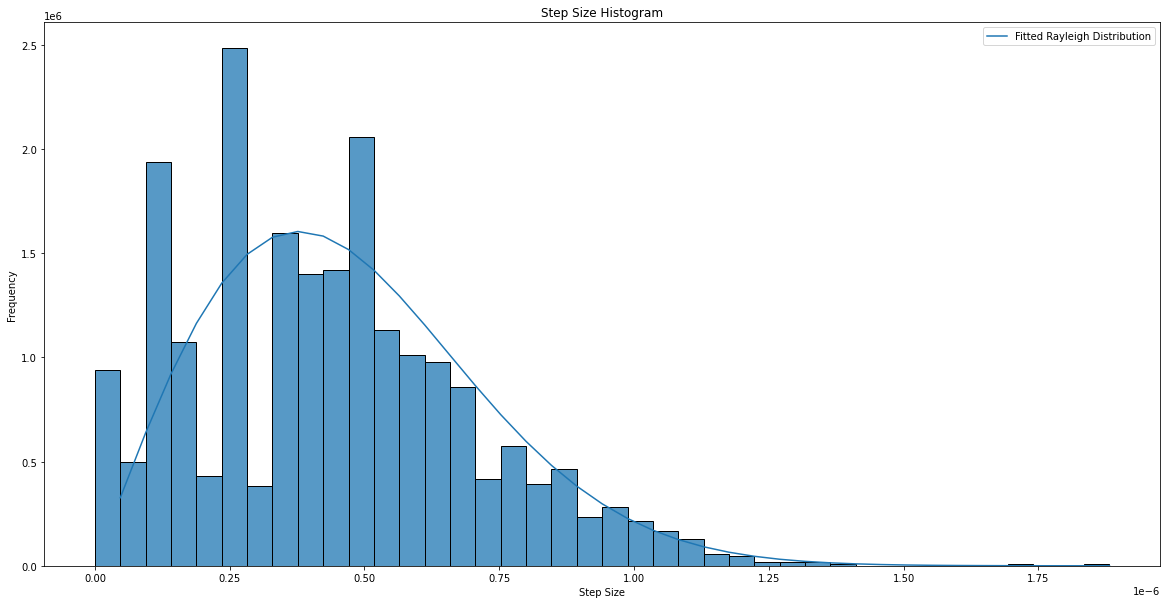

In [647]:
# Plot fitted curve against histogram
plt.figure(figsize=(20,10))
sns.histplot(data=step_sizes, stat='density', bins=40)
plt.plot(step_size, f(step_size, *popt), label="Fitted Rayleigh Distribution")
plt.xlabel("Step Size")
plt.ylabel("Frequency")
plt.title("Step Size Histogram")
plt.legend()
plt.show()

In [632]:
k_actual = 1.38e-23

In [687]:
# METHOD 1
bead_diameter = 1.9e-6
viscosity = 0.001
T = 296.5
t = 0.5

# D = kT/(gamma) | gamma is the drag coefficient 6πηr with r = radius, n = viscosity of water
gamma = 6*np.pi*0.5*bead_diameter*viscosity

r = np.array(step_sizes)
r2_sum = sum(r**2)/len(r)
D = r2_sum/(4*t)
k = D*gamma/T
k

7.714718150108878e-24

In [688]:
(k_actual-k)/k_actual

0.440962452890661

In [689]:
# METHOD TWO
# D *t = popt[0]
D = popt[0]/t
k = D*gamma/T
(k_actual-k) / k_actual

0.3745294035853048

In [690]:
r_list = []
temp = []
for file in file_list:
    with open(FILEPATH + "/" + file, "r") as f:
        lines = f.readlines()

        x0, y0 = -1, -1
        i = 0

        for line in lines:
            bb_box = np.array([float(i) for i in line.split(",")[1:]])*pixel_to_m
            r_temp = (bb_box[2] + bb_box[3])/2
            r_list.append(r_temp)

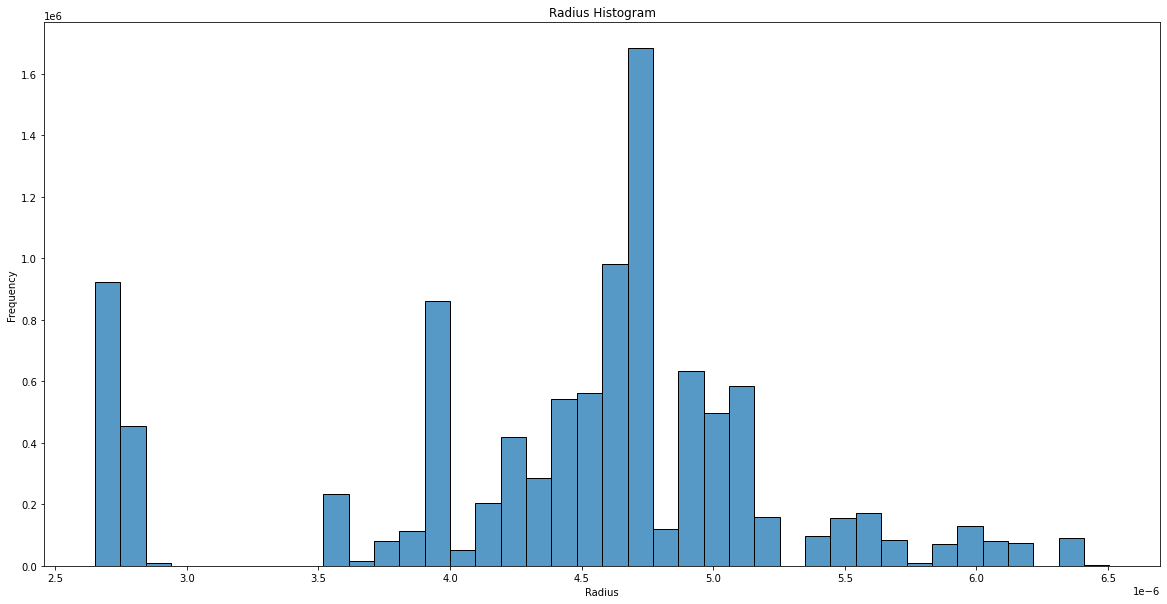

In [637]:
# Plot histogram of r
plt.figure(figsize=(20,10))
sns.histplot(data=r_list, stat='density', bins=40)
plt.xlabel("Radius")
plt.ylabel("Frequency")
plt.title("Radius Histogram")
plt.show()